<a href="https://colab.research.google.com/github/Hhjjvcdsjioi76889/Rakhi.ipynb/blob/main/Copy_of_Rakhi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

In [ ]:
from mlxtend.plotting import plot_learning_curves
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Step 1: Upload the Dataset
from google.colab import files
uploaded = files.upload()


Saving archive (3).zip to archive (3).zip


In [ ]:
import zipfile
import os

# Unzip the file
zip_ref = zipfile.ZipFile('archive (3).zip', 'r')
zip_ref.extractall()
zip_ref.close()

# Check files in the directory
os.listdir()


['.config', 'creditcard.csv', 'archive (3).zip', 'p', 'sample_data']

In [ ]:
df = pd.read_csv('creditcard.csv')
df.head()  # To display the first few rows


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Describe Data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
df.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
print("Shape of the dataset:", df.shape)


Shape of the dataset: (284807, 31)


In [ ]:
print("Class distribution:\n", df['Class'].value_counts())


Class distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


In [ ]:
# Features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (199364, 30)
Test set shape: (85443, 30)


In [ ]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Resampled training set shape:", X_train_res.shape)
print("Class distribution after SMOTE:", pd.Series(y_train_res).value_counts())


Resampled training set shape: (398040, 30)
Class distribution after SMOTE: Class
0    199020
1    199020
Name: count, dtype: int64


In [ ]:
# Create the Logistic Regression model
model = LogisticRegression()

# Train the model on the resampled dataset
model.fit(X_train_res, y_train_res)


LogisticRegression()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.9796355465046873
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.07      0.86      0.13       148

    accuracy                           0.98     85443
   macro avg       0.53      0.92      0.56     85443
weighted avg       1.00      0.98      0.99     85443



([np.float64(0.000854185508994071),
  np.float64(0.0010300472314340268),
  np.float64(0.0010635447023749707),
  np.float64(0.0009923625766254647),
  np.float64(0.001050145713998593),
  np.float64(0.01710464609921951),
  np.float64(0.021717128213962704),
  np.float64(0.023527786152145513),
  np.float64(0.02460389240612334),
  np.float64(0.024796502864033766)],
 [np.float64(0.000994815256954929),
  np.float64(0.000994815256954929),
  np.float64(0.0009362967124281685),
  np.float64(0.0009362967124281685),
  np.float64(0.0010533338014816894),
  np.float64(0.009152300363985347),
  np.float64(0.013026228011656893),
  np.float64(0.013705043128167315),
  np.float64(0.01555422913521295),
  np.float64(0.020364453495312664)])

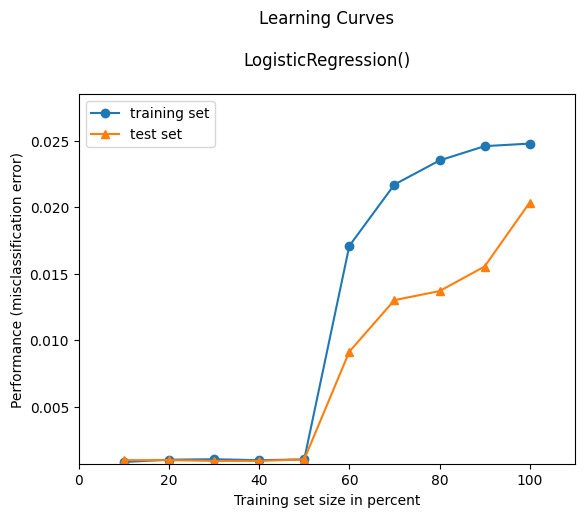

In [ ]:
from mlxtend.plotting import plot_learning_curves

# Plot learning curves (this will take time)
plot_learning_curves(X_train_res, y_train_res, X_test, y_test, model)


In [ ]:
from sklearn.metrics import confusion_matrix # Import confusion_matrix
import numpy as np
import pandas as pd

cm = np.array(confusion_matrix(y_test, y_pred, labels=[1,0])) # Use y_pred instead of y_predict
confusion = pd.DataFrame(cm, index=['is Fraud', 'is Normal'],columns=['predicted fraud','predicted normal'])
confusion

,predicted fraud,predicted normal
is Fraud,127,21
is Normal,1719,83576


In [ ]:
import seaborn as sns

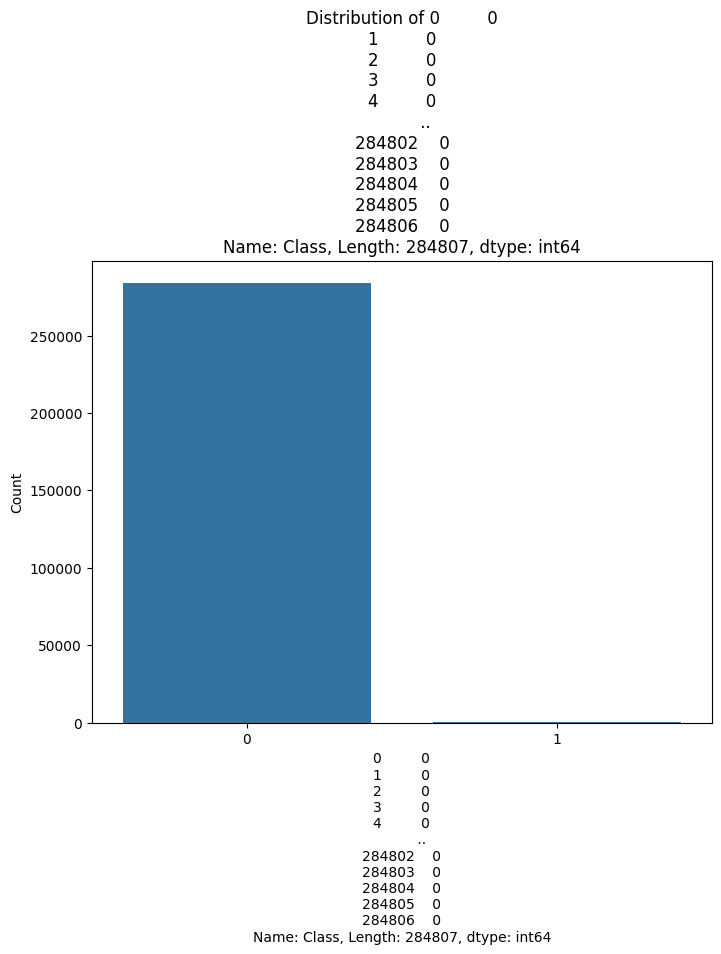

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def countplot_data(dataframe, column):
    """
    Generates a countplot for a specified column in a dataframe.

    Args:
        dataframe: The pandas DataFrame containing the data.
        column: The name of the column to visualize.
    """
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    sns.countplot(x=column, data=dataframe)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

# Now you can call the function:
countplot_data(df, df.Class)

<Axes: >

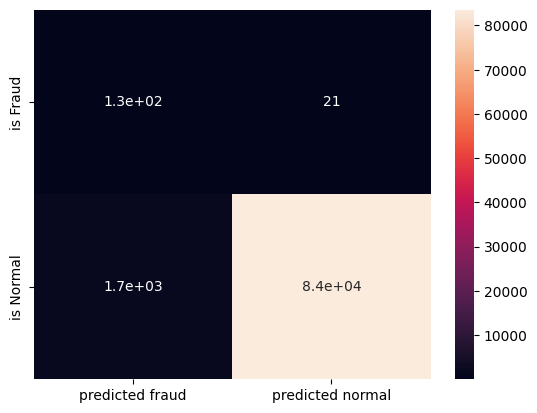

In [ ]:
sns.heatmap(confusion, annot=True)

In [ ]:
print(classification_report(y_test, y_pred)) # Change y_predict to y_pred

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.07      0.86      0.13       148

    accuracy                           0.98     85443
   macro avg       0.53      0.92      0.56     85443
weighted avg       1.00      0.98      0.99     85443



In [ ]:
amount_more = 0
amount_less = 0
for i in range(df.shape[0]):  # Change df_refine to df
    if(df.iloc[i]["Amount"] < 2500):  # Change df_refine to df
        amount_less += 1
    else:
        amount_more += 1
print(amount_more)
print(amount_less)

449
284358


In [ ]:
percentage_less = (amount_less/df.shape[0])*100
percentage_less

99.84234938045763

In [ ]:
fraud = 0
legitimate = 1
for i in range(df.shape[0]):  # Use the original dataframe 'df'
    if(df.iloc[i]["Amount"]<2500):
        if(df.iloc[i]["Class"] == 0):
            legitimate += 1
        else:
            fraud+=1
print(fraud)
print(legitimate)

492
283867


In [ ]:
df.Class.value_counts()

,count
Class,
0,284315
1,492


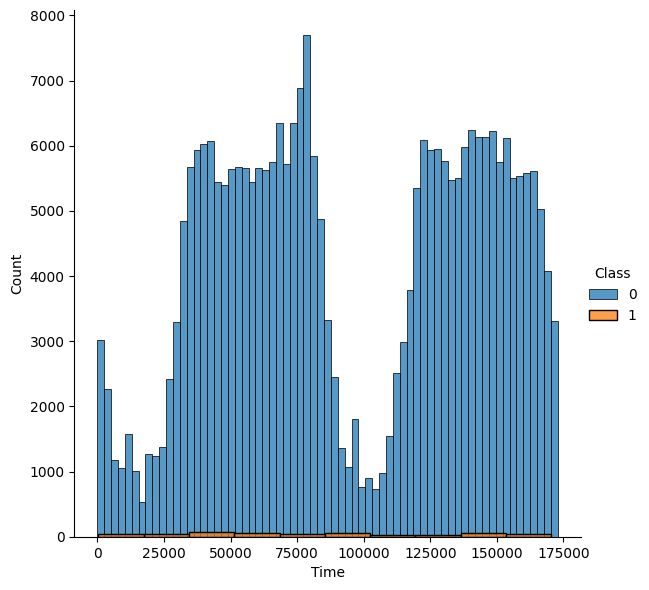

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of 'Time' column for fraud and non-fraud transactions
sns.FacetGrid(df, hue="Class", height=6).map(sns.histplot, "Time").add_legend()

# Display the plot
plt.show()


<Axes: >

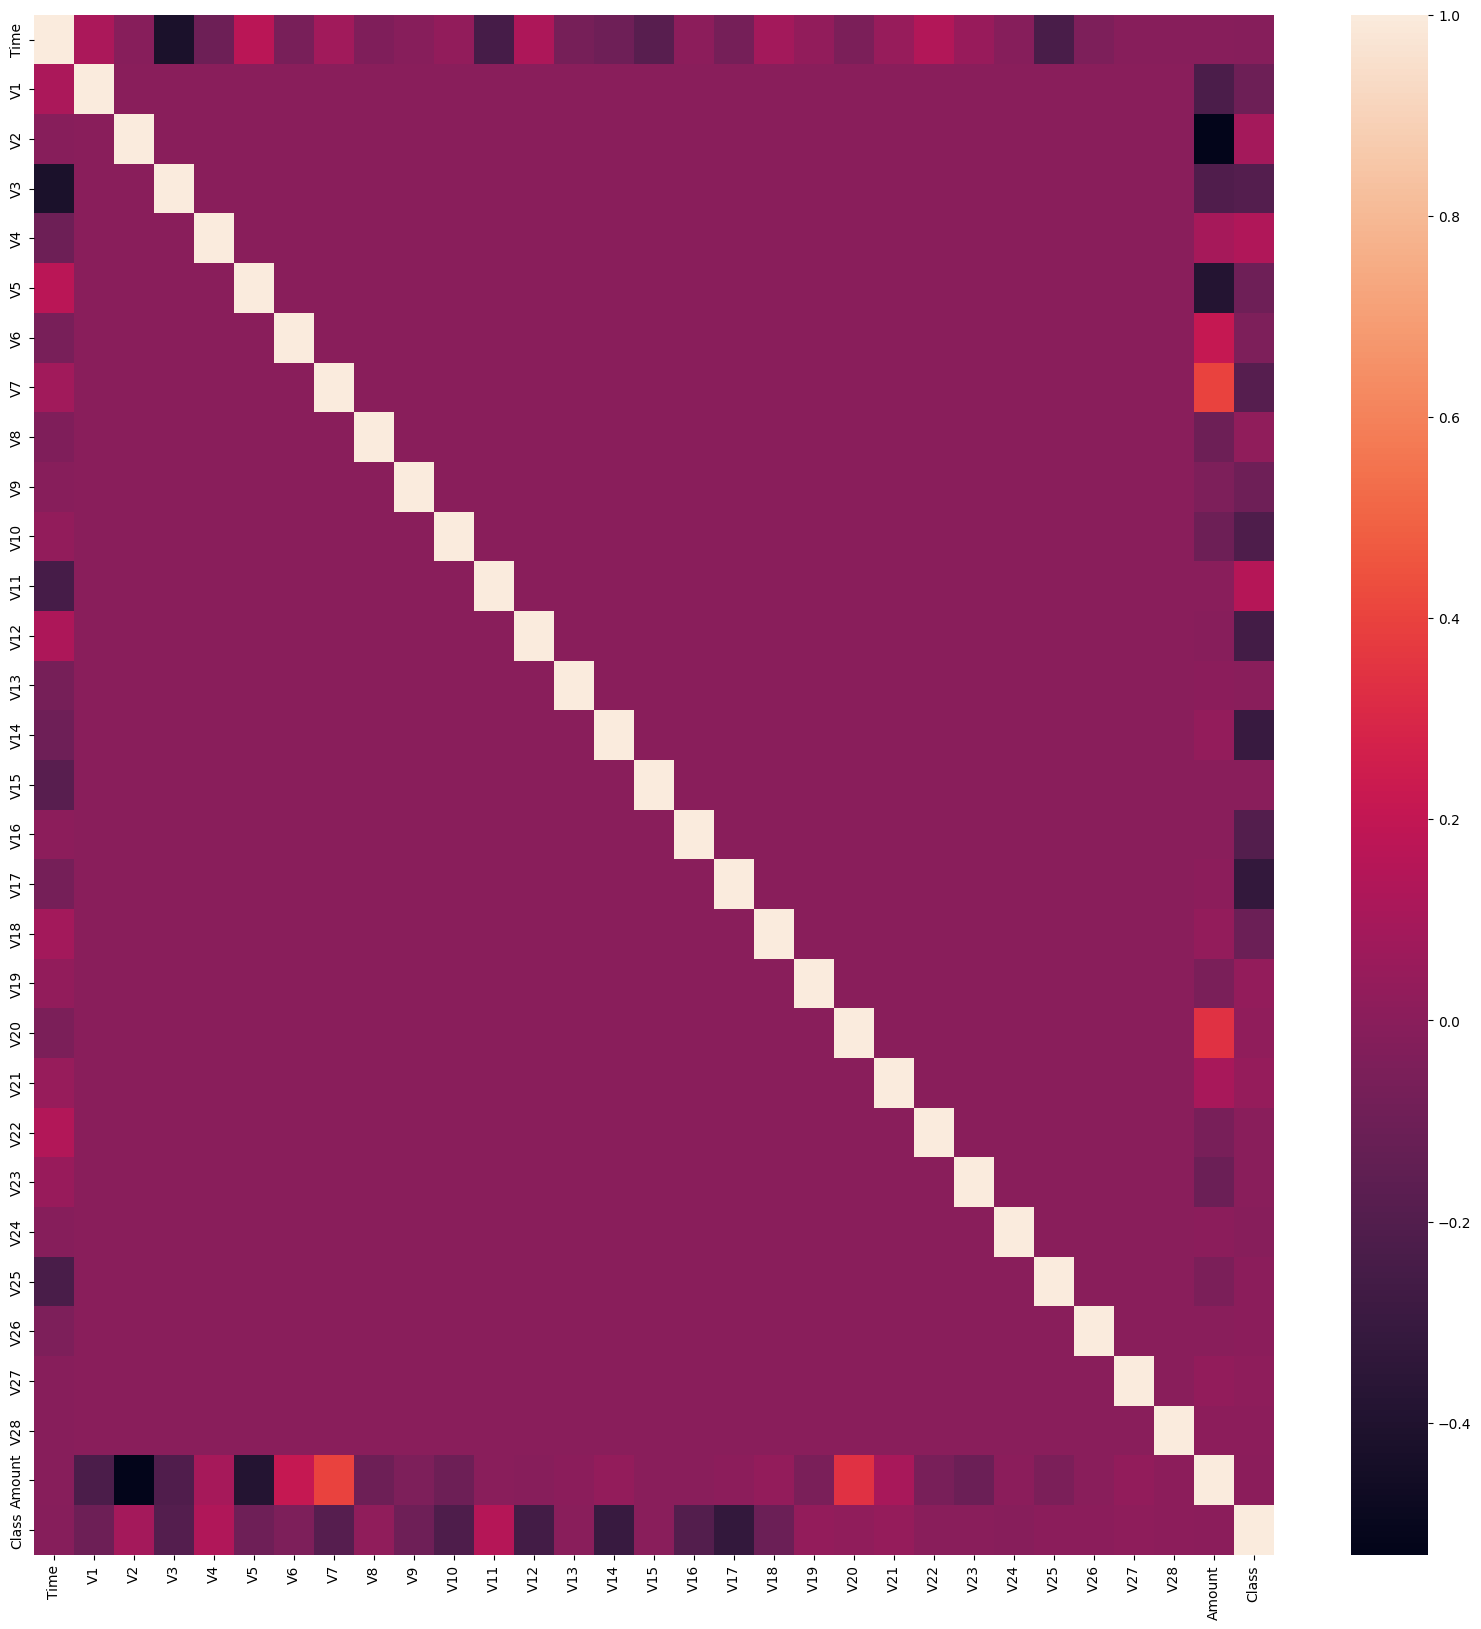

In [ ]:
plt.figure(figsize=(20,20))
df_corr = df.corr()
sns.heatmap(df_corr)

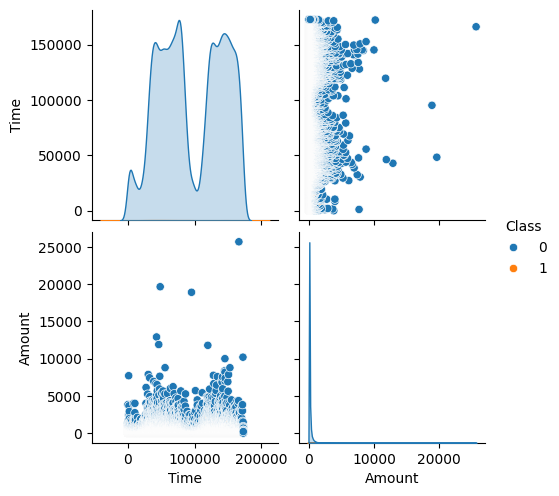

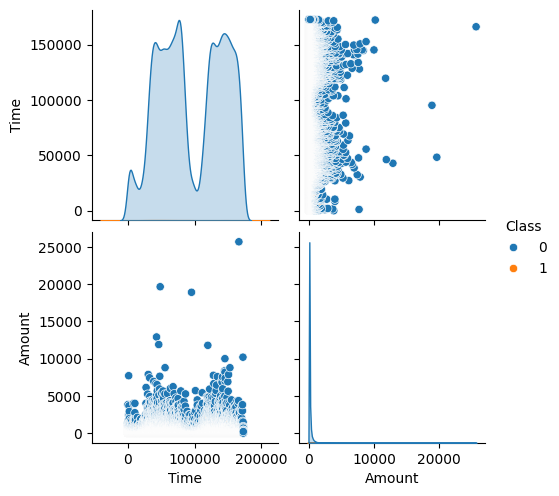

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# If you intend to use seaborn.pairplot:
sns.pairplot(df, hue="Class", vars=["Time", "Amount"])
plt.show()

# If you intended to define a custom function:
def pairplot_data_grid(dataframe, x_col, y_col, hue_col):
    """
    Generates a pairplot with a grid for specified columns.

    Args:
        dataframe: The pandas DataFrame containing the data.
        x_col: The name of the column for the x-axis.
        y_col: The name of the column for the y-axis.
        hue_col: The name of the column to use for color encoding.
    """
    sns.pairplot(dataframe, hue=hue_col, vars=[x_col, y_col])
    plt.show()

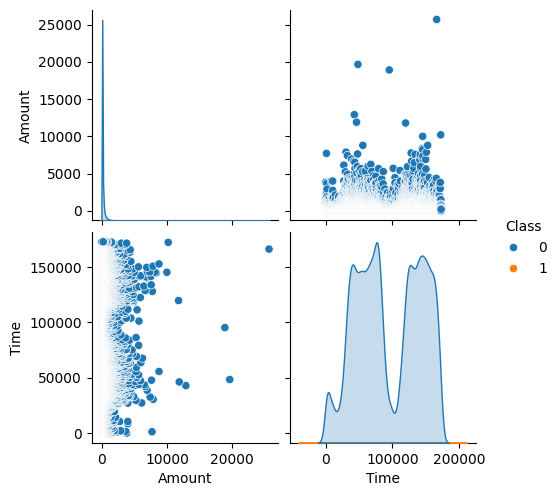

In [ ]:
pairplot_data_grid(df, "Amount", "Time", "Class")

In [ ]:
# Create Train and Test Data in ratio 70:30
X = df.drop(labels='Class', axis=1) # Features
y = df.loc[:,'Class']               # Target Variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
# Use Synthetic Minority Oversampling
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mutual_infos = pd.Series(data=mutual_info_classif(X_res, y_res, discrete_features=False, random_state=1), index=X_train.columns)

In [ ]:
mutual_infos.sort_values(ascending=False)

,0
V14,0.535044
V10,0.464775
V12,0.456052
V17,0.438193
V4,0.427427
V11,0.404040
Amount,0.392909
V3,0.387187
V16,0.335317
V7,0.304171


In [ ]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# ... (other imports and code) ...

# Load your dataframe here, for example, using pandas.read_csv
df = pd.read_csv('creditcard.csv') # Assuming 'creditcard.csv' is your data file

#

In [ ]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler # Importing StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef
from sklearn.linear_model import SGDClassifier # Importing SGDClassifier

# ... (other imports and code) ...

# Load your dataframe here, for example, using pandas.read_csv
df = pd.read_csv('creditcard.csv') # Assuming 'creditcard.csv' is your data file

# Create Train and Test Data in ratio 70:30
X = df.drop(labels='Class', axis=1) # Features
y = df.loc[:,'Class']               # Target Variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Use Synthetic Minority Oversampling
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

# The parameters of each classifier are different


In [ ]:

# Create Train and Test Data in ratio 70:30
X = df.drop(labels='Class', axis=1) # Features
y = df.loc[:,'Class']               # Target Variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Use Synthetic Minority Oversampling
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

# The parameters of each classifier are different
# Define the SGDClassifier and parameters for GridSearchCV
sgd = SGDClassifier(random_state=42)
param_grid_sgd = {
    'loss': ['hinge', 'log_loss', 'modified_huber'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01]
}

# Create GridSearchCV object
grid_sgd = GridSearchCV(sgd, param_grid_sgd, cv=5, scoring='accuracy')

# Fit the model - This is the crucial step
grid_sgd.fit(X_res, y_res)  # Fit to your training data

def grid_eval(grid_search_model):
    """Evaluates a GridSearchCV model and prints results."""
    print("Best parameters found: ", grid_search_model.best_params_)
    print("Best score: ", grid_search_model.best_score_)

    # You can add more evaluation metrics here if needed, such as:
    y_pred = grid_search_model.predict(X_test)  # Assuming X_test is defined
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

# Now you can call grid_eval with your grid_sgd object:
grid_eval(grid_sgd)

In [ ]:
evaluation(y_test, grid_sgd, X_test)